In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

#### The hourly wages in a particular industry are normally distributed with mean  13.20 and standard deviation  2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)


In [2]:
# H0:mu = 13.20
# H1:mu < 13.20

In [3]:
alpha =0.01
xbar = 12.20
mu = 13.20
sigma = 2.50
n = 40
zstat = (xbar-mu)/(sigma/np.sqrt(n))
pvalue = stats.norm.cdf(zstat)

In [4]:
zstat,pvalue

(-2.5298221281347035, 0.005706018193000826)

In [5]:
if pvalue>alpha : print("H0 can not be rejected")
else:print("H0 is rejected")

H0 is rejected


#### Company can be acussed of paying substandart wages

##### *******************************************************************************************************************************************

#### Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [6]:
# H0: mu_soli1 = mu_soli2
# H1: mu_soli1 != mu_soli2

In [7]:
soil = pd.read_excel("soil.xlsx")

In [8]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [9]:
soil.describe().T

,count,mean,std,min,25%,50%,75%,max
Soil1,30.0,1.691800,0.206903,1.110,1.572,1.675,1.86525,2.054
Soil2,35.0,1.417114,0.219184,1.053,1.231,1.379,1.55900,1.878


In [10]:
soil.isnull().sum()

Soil1    5
Soil2    0
dtype: int64

In [11]:
stats.ttest_ind_from_stats(mean1 = soil[soil["Soil1"].notnull()]["Soil1"].mean(),
                           mean2 = soil["Soil2"].mean(),
                           nobs1=29,
                           nobs2= 34,
                           std1=soil[soil["Soil1"].notnull()]["Soil1"].std(),
                           std2=soil["Soil2"].std(),
                           alternative="two-sided")

Ttest_indResult(statistic=5.086659903313431, pvalue=3.7318047944382767e-06)

In [12]:
Indtest = stats.ttest_ind(a=soil["Soil1"],b=soil["Soil2"],nan_policy="omit",alternative="two-sided")
Indtest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.59322873235282e-06)

In [13]:
tstat, pvalue= Indtest[0],Indtest[1]

In [14]:
if pvalue>alpha : print("H0 can not be rejected")
else:print("H0 is rejected")

H0 is rejected


#### Soils appear to differ with respect to average shear strength, at the 1% significance level

##### *******************************************************************************************************************************************

#### The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset
#### Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
#### Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [15]:
# H0:Asianmath_mu = Europeanmath_mu 
# H0:Asianmath_mu != Europeanmath_mu

In [16]:
pisa = pd.read_excel("2015 PISA Test.xlsx")

In [17]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [18]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Code            70 non-null     object 
 1   Continent_Code          65 non-null     object 
 2   internet_users_per_100  70 non-null     float64
 3   Math                    70 non-null     float64
 4   Reading                 70 non-null     float64
 5   Science                 70 non-null     float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [19]:
pisa.isnull().sum()

Country Code              0
Continent_Code            5
internet_users_per_100    0
Math                      0
Reading                   0
Science                   0
dtype: int64

In [20]:
#pisa.dropna(subset = "Continent_Code",axis = 0,how = "all",inplace=True)......if we need to drop nan rows in Continent_Code feature

In [21]:
for i in pisa.Continent_Code.value_counts().index:
    print("*"*30,i,"*"*30)
    print(pisa[pisa["Continent_Code"] == i].describe())
    print("\n")

****************************** EU ******************************
       internet_users_per_100        Math     Reading     Science
count               37.000000   37.000000   37.000000   37.000000
mean                77.274888  477.981449  476.164608  478.299381
std                 12.425773   35.150403   37.720545   34.450616
min                 53.744979  371.311400  351.741500  383.682400
25%                 68.632900  464.040100  452.514300  460.774900
50%                 76.184000  489.728700  487.250100  490.225000
75%                 87.479056  503.722000  499.814600  501.936900
max                 98.200000  521.250600  526.424700  534.193700


****************************** AS ******************************
       internet_users_per_100        Math     Reading     Science
count               17.000000   17.000000   17.000000   17.000000
mean                68.455613  466.216647  454.059682  467.945847
std                 21.086060   64.356490   57.048962   56.671371
min       

In [22]:
df = pisa[pisa["Continent_Code"].isin(["EU","AS"])][["Math","Continent_Code"]]
df.head()

,Math,Continent_Code
0,413.1570,EU
1,427.4827,AS
4,496.7423,EU
5,506.9844,EU
6,441.1899,EU


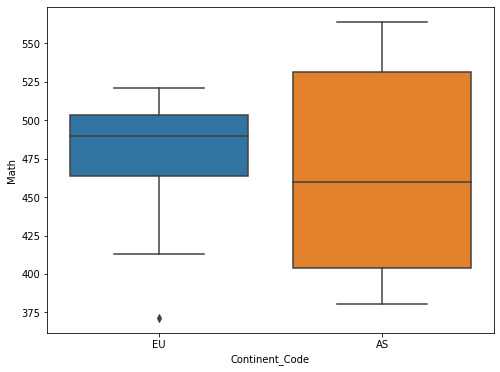

In [23]:
plt.figure(figsize = (8,6))
sns.boxplot(y= df.Math, x = df.Continent_Code);

In [24]:

# *********************************if nan values need to be dropped*************

stats.ttest_ind_from_stats(mean1=pisa[pisa["Continent_Code"] == "EU"]["Math"].mean(),
                           mean2=pisa[pisa["Continent_Code"] == "AS"]["Math"].mean(),
                           alternative="two-sided",
                           std1=pisa[pisa["Continent_Code"] == "EU"]["Math"].std(),
                           std2=pisa[pisa["Continent_Code"] == "AS"]["Math"].std(),
                           nobs2=pisa[pisa["Continent_Code"] == "AS"]["Math"].count(),
                           nobs1=pisa[pisa["Continent_Code"] == "EU"]["Math"].count())

Ttest_indResult(statistic=0.8700553179679787, pvalue=0.38826888111307556)

In [25]:
Indtest = stats.ttest_ind(a =pisa[pisa["Continent_Code"] == "EU"]["Math"],b=pisa[pisa["Continent_Code"] == "AS"]["Math"],nan_policy="omit",alternative="two-sided")
Indtest

Ttest_indResult(statistic=0.8700553179679789, pvalue=0.38826888111307556)

In [26]:
tstat, pvalue= Indtest[0],Indtest[1]

In [27]:
if pvalue>alpha : print("H0 can not be rejected")
else:print("H0 is can be rejected")

H0 can not be rejected


##### There is significantly  difference between Math scores of Asian and European students